#Importando bibliotecas

In [11]:
# Possivelmente será preciso realizar o downgrade do scipy para rodar .api
!pip install scipy==1.2 --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.6 MB 67.7 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.3.8 requires scipy>=1.2.1, but you have scipy 1.2.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Covariância

> ### Significado
> ***

A covariância, ou variância conjunta, é a medida do grau de interdependência (ou inter-relação) numérica entre duas variáveis. Não quer dizer sobre causalidade

> ### Fórmula
> ***

Covariância populacional
$$\sigma_{xy} = \frac 1n\sum_{i=1}^{n}(X_i-\mu_x)(Y_i-\mu_y)$$

Covariância amostral

$$S_{xy} = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})$$

In [ ]:
# Utilizar método .cov()
# A covariância de uma variável com ela mesma é a variância
# A covariância é influenciada pela unidade de medida
dataset[['Coluna1', 'Coluna2']].cov()

> ### Entendimento
> ***

Valor de $S_{xy}$ positivo indica uma associação linear positiva entre x e y, ou seja, à medida que o valor de x aumenta, o valor de y também aumenta. Neste caso, podemos ver na figura abaixo que os pontos que têm a maior influência sobre $S_{xy}$ devem estar nos quadrantes I e III.

Se o valor de $S_{xy}$ for negativo temos um indicativo de associação linear negativa entre x e y, ou seja, à medida que x aumenta, o valor de y diminui. Neste caso, podemos ver na figura abaixo que os pontos que têm a maior influência sobre $S_{xy}$ devem estar nos quadrantes II e IV.

Finalmente, se os pontos estiverem uniformemente distribuídos pelos quadrantes, o valor de $S_{xy}$ se aproximará de zero, indicando que não existe nenhuma associação linear entre x e y.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img026.png" width=50%>

In [ ]:
# Verificando graficamente a covariância 

x = dataset['X']
y = dataset['Y']

ax = sns.scatterplot(x,y)
ax.figure.set_size_inches(10,6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors = 'black', linestyles = 'dashed')
ay.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colrs = 'black', linestyles = 'dashed')

# Correlação

> ### Significado
> ***

É obtido dividindo-se a covariância da população ou amostra pelo produto do desvio padrão populacional ou amostral de x pelo desvio padrão populacional ou amostral de y.

O coeficiente de correlação varia de -1 a +1. Valores que se aproximam de -1 ou +1 indicam uma relação linear forte. Quanto mais próxima a correlação estiver de zero, mais fraca será a relação.

Um ponto importante é que o coeficiente de correlação é uma medida de associação linear e não necessariamente de causação. Uma correlação alta entre duas variáveis não significa, necessariamente, que variações em uma delas provocará alterações na outra.

> ### Fórmula
> ***

Coeficiente de correlação de Pearson - dados populacionais

$$\rho_{xy} = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$$

Coeficiente de correlação de Pearson - dados amostrais

$$r_{xy} = \frac{s_{xy}}{s_{x}s_{y}}$$

Onde

$\sigma_{xy}$ = covariância populacional entre x e y

$s_{xy}$ = covariância amostral entre x e y

$\sigma_{x}$ e $\sigma_{y}$ = desvios padrão populacionais de x e y, respectivamente

$s_{x}$ e $s_{y}$ = desvios padrão amostrais de x e y, respectivamente

In [ ]:
# Utilizar método .corr()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
dataset.corr()

> ### Entendimento
> ***

*   0.9 para mais ou para menos indica uma correlação muito forte.
*   0.7 a 0.9 positivo ou negativo indica uma correlação forte.
*   0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
*   0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
*   0 a 0.3 positivo ou negativo indica uma correlação desprezível.

# Regressão linear simples

> ### Significado
> ***

A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explicativas ou independentes, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

$$Y_i = \beta_1 + \beta_2X_i$$

Terminologia: 

*  A variável que é prevista é conhecida como variável dependente (*Y*).
*  A variável utilizada para prever o valor da variável dependente é conhecida como variável independente (*X*).
*  $\beta_1$ é conhecido como intercepto
*  $\beta_2$ é o coefiente angular

Em uma análise de regressão linear simples, o interesse está em estimar a função de regressão populacional como a apresentada acima, ou seja, estimar os valores dos parâmetros $\beta_1$ e $\beta_2$ com base nas observações de $Y$ e $X$.




> ### Método dos quadrados mínimos ordinários
> ***

Considere a seguinte **função de regressão da população (FRP)** para duas variáveis:

$$Y_i = \beta_1 + \beta_2X_i + u_i$$

Como a **FRP** não pode ser obtida de forma direta, precisamos estimá-la através da **função de regressão amostral (FRA)**.

$$Y_i = \hat{\beta}_1 + \hat{\beta}_2X_i + \hat{u}_i$$
$$Y_i = \hat{Y}_i + \hat{u}_i$$

onde $\hat{Y}_i$ é o valor estimado de $Y_i$.

A partir da equação acima podemos expressar o erro da seguinte maneira:

$$\hat{u}_i = Y_i - \hat{Y}_i$$
$$\hat{u}_i = Y_i - \hat{\beta}_1 - \hat{\beta}_2X_i$$

A ideia é determinar **FRA** de forma que fique o mais próximo possível do valor observado de $Y$. Intuitivamente uma forma interessante de fazer isso seria determinar **FRA** de maneira que a soma dos resíduos seja a menor possível.

$$\sum\hat{u}_i = \sum{(Y_i - \hat{Y}_i)}$$

Avaliando a figura abaixo se pode verificar que talvez o critério de minimizar a soma dos resíduos não seja a melhor abordagem para solucionar o problema.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img015.png" width=50%>

O critério de minimização da soma dos resíduos assume que todos os resíduos tem o mesmo peso no somatório, o que nem sempre se comprova. Em nosso exemplo os resíduos $\hat{u}_1$ e $\hat{u}_4$ encontram-se bem mais afastados da **FRA** que $\hat{u}_2$ e $\hat{u}_3$. Isso acarreta na possibilidade de que a soma dos $\hat{u}_i$'s seja bastante pequena e até mesmo nula, mesmo que os resíduos estejam muito dispersos em relação a reta de regressão.

Para evitar tal problema adotou-se o critério de minimização da soma dos quadrados dos resíduos que é conhecido como **Método de Mínimos Quadrados**.

$$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{Y}_i)^2}$$
$$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{\beta}_1 - \hat{\beta}_2X_i)^2}$$

Após um procedimento de diferenciação, algumas simplificações e manipulações algébricas obtemos os **estimadores de mínimos quadrados**.

$$
\begin{equation}
\boxed{\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}}
\end{equation}
$$

$$
\begin{equation}
\boxed{
\begin{eqnarray}
\hat{\beta}_1 &=& \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}\\
&=& \bar{Y} - \hat{\beta}_2\bar{X}
\end{eqnarray}
}
\end{equation}
$$

> ### Isolando variáveis
> ***

In [5]:
# Isolar as variáveis X e Y do dataset
Y = dataset['Y']
X = sm.add_constant(dataset['X'])

> ### Utilizando OLS
> ***

In [ ]:
# OLS = estimação de mínimos quadrados ordinários
https://www.statsmodels.org/stable/regression.html
resultado_regressao = sm.OLS(Y, X, missing='drop').fit()

> ### Demonstrando e interpretando resultado
> ***

In [ ]:
# Para obter apenas beta_1 e beta_2
resultado_regressao.params()

In [ ]:
# Para obter intervalo de confiança, sendo 0 limite inferior e 1 limite superior
# Alpha pode ser alterado para qualquer outro nível de significância
resultado_regressao.conf_int(alpha=0.05)

In [ ]:
print(resultado_regressao.summary())

Interpretação

> ### Observando graficamente
> ***

A equação formulada acima é conhecida como **função de regressão populacional (FRP)** e em alguns livros é também representada da seguinte forma:

$$E(Y|X_i) = \beta_1 + \beta_2X_i$$

Ela afirma que o valor esperado da distribuição de $Y$, dado $X_i$, tem uma relação funcional com $X_i$, isto é, a resposta média de $Y$ varia com $X$. O coeficientes $\beta_1$ e $\beta_2$ são conhecidos como coeficientes de regressão e também são conhecidos como intercepto e coeficiente angular, respectivamente.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img027.png" width=50%>


In [ ]:
# Verificando graficamente a covariância 

x = dataset['X']
y = dataset['Y']

ax = sns.lmplot(x='X', y='Y', dados=dataset)
ax.figure.set_size_inches(12,6)
ax.figure.suptitle('Reta regressão', fontsize=16, y=1.02)
ax.set_xlabels('Nome da variável X', fontsize=14)
ax.set_ylabels('Nome da variável Y', fontsize=14)

> ### Utilizando equação para predição
> ***

In [ ]:
dataset['Y_pred'] = resultado.regressao.predict()

In [ ]:
def predicao(x):
  return resultado.regressao.predict([1, X])[0]

> ### Resíduos
> ***

O resíduo da i-ésima observação é a diferença entre o valor observado de nossa variável dependente ($Y_i$) e o valor estimado da variável dependente ($\hat{Y}_i$).

$$\hat{u}_i = Y_i - \hat{Y}_i$$

Em outras palavras, $\hat{u}_i$ é o erro obtido ao se utilizar a equação de regressão estimada para prever o valor da variável dependente.

In [ ]:
dataset['Residuos'] = resultado_regressao.resid
dataset['Residuos']

In [ ]:
# Obtendo o grau de liberdade dos resíduos

resultado_regressao.df_resid

Suposições sobre o termo de erro $u$
1. O termo de erro $u$ é uma variável aleatória com média igual a zero: $E(u) = 0$
2. A variância de $u$ é a mesma para todos os valores de $X$
3. O valores de $u$ são independentes
4. O termo de erro $u$ é uma variável aleatória normalmente distribuída.

Sobre os erros, eles podem ter:

*   Homocedasticidade = variância dos erros é constante
*   Heterocedasticidade = variância dos erros não é constante

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img028.jpg" width=80%>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

In [7]:
# Para visualizar os resíduos em comparação ao Y_pred:

ax = sns.scatterplot(x=dataset.Y_pred, y=dataset.Residuos **2)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos vs Y_pred', fontsize=18)
ax.set_xlabels('Y_pred', fontsize=14)
ax.set_ylabels('Resíduos2', fontsize=14)
ax

> ### Coeficiente de determinação R2
> ***

O **coeficiente de determinação R²** é uma medida resumida que diz quanto a linha de regressão amostral se ajusta aos dados. Pode ser obtido a partir da seguinte fórmula:

$$R^2 = \frac{\big[\sum{(Y_i - \bar{Y})(\hat{Y}_i - \bar{Y})}\big]^2}{\sum{(Y_i - \bar{Y}})^2 \sum{(\hat{Y}_i - \bar{Y}})^2}$$

Sabemos que o i-ésimo resíduo representa o erro de usarmos $\hat{Y}_i$ para estimar $Y_i$. A soma dos quadrados desses resíduos é o valor que é minimizado pelo método dos mínimos quadrados. Esse valor pode ser representado da seguinte forma:

$$SQE = \sum{(Y_i - \hat{Y}_i)^2}$$

O valor da SQE é uma medida do erro de se usar a equação de regressão estimada para estimar os valores da variável dependente na amostra.

Outro componente que podemos medir é a soma dos quadrados total (SQT) que representa a medida do erro envolvido no uso da média ($\bar{Y}$) para fazer as estimativas. A SQT pode ser representada da forma abaixo:

$$SQT = \sum{(Y_i - \bar{Y})^2}$$

Para quantificar o quanto os valores estimados ($\hat{Y}_i$) se afastam da média ($\bar{Y}$) podemos obter mais uma soma de quadrados. Essa soma é chamada de soma dos quadrados da regressão (SQR) e é representada pela seguinte fórmula:

$$SQR = \sum{(\hat{Y}_i - \bar{Y})^2}$$


In [ ]:
# Utilizando o SRQ (sum of squared residuals): 
  
resultado_regressao.ssr

In [ ]:
# Utilizando o SQT (explained sum of squares):

resultado_regressao.ess

Relação entre as somas de quadrados

$$SQT = SQR + SQE$$

Onde,
*   $SQE = \sum{(Y_i - \hat{Y}_i)^2}$

*   $SQT = \sum{(Y_i - \bar{Y})^2}$

*   $SQR = \sum{(\hat{Y}_i - \bar{Y})^2}$


<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img029.png" width=50%>

A regressão estimada teria um ajuste perfeito se todos os valores da variável dependente ($Y_i$) estiverem sobre a reta de regressão estimada. Quando isso ocorre temos $Y_i - \hat{Y}_i = 0$ para todas as observações, o que resulta em uma $SQE = 0$. Como $SQT=SQR+SQE$, é possível deduzir que para termos um ajuste perfeito $SQT$ deve ser igual a $SQR$ e a razão entre estas medidas ($\frac{SQR}{SQT}$) deve ser igual a 1.

Quando o ajuste não é tão perfeito nota-se que a $SQE$ apresenta valores maiores o que faz a razão $\frac{SQR}{SQT}$ diminuir, e em uma situação de total imperfeição do ajuste teríamos uma $SQR=0$ e $SQE=SQT$ levando a $\frac{SQR}{SQT}=0$.

A razão $\frac{SQR}{SQT}$, que assume valores entre 0 e 1, é utilizada como medida de eficiência do ajuste da equação de regressão estimada. Essa medida é conhecida como coeficiente de determinação (R²).

$$R^2 = \frac{SQR}{SQT}$$

Observação: Somente com a utilização do R² não é possível tirar conclusões sobre a relação entre $Y$ e $X$ ser ou não ser estatisticamente
significativa. Este tipo de afirmação deve basear-se em considerações que envolvem o tamanho da amostra e as propriedades da distribuição amostral dos estimadores mínimos quadrados.

In [ ]:
# Utilizando R2: 

resultado_regressao.rsquared

> ### Erro quadrático médio para obter estatística de teste
> ***

Lembre-se que a **soma dos quadrados do erros ou resíduos (SQE)** é uma medida numérica da variabilidade dos dados observados em torno da reta de regressão estimada. Todas as somas de quadrados, estudadas anteriormente, estão associadas a um determinado número de graus de liberdade. No caso da SQE, como devem ser estimados dois parâmetros, temos $n-2$ graus de liberdade.

O **erro quadrático médio**, representado pela equação abaixo, pode ser obtido dividindo-se a SQE por $n-2$ graus de liberdade.

$$EQM = \frac{SQE}{n-2}$$

In [ ]:
# Obtendo EQM pelo statsmodels:

EQM = resultado_regressao.mse_resid

In [ ]:
# Obtendo EQM alternativamente

EQM = resultado_regressao.ssr / resultado_regressao.df_resid

> ### Teste de hipótese para nulidade do coeficiente angular
> ***

Considere o seguinte modelo de regressão linear simples:

$$Y_i = \beta_1 + \beta_2X_i + u_i$$

Se as variáveis $Y$ e $X$ são linearmente relacionadas, espera-se que $\beta_2$ seja diferente de zero. Para testar esta hipótese formulamos um teste de hipótese com a seguinte especificação de hipóteses nula e alternativa:

*   $H_0: \beta_2 = 0$
*   $H_1: \beta_2 \neq 0$

Caso $H_0$ seja rejeitada, concluiremos que existe uma relação linear estatisticamente significativa entre as duas variáveis.

Considere agora que $b_1$ e $b_2$ são nossos estimadores de mínimos quadrados. Considere que a distribuição amostral de $b_2$ segue uma normal e também as seguintes propriedades:

$$E(b_2) = \beta_2$$
$$\sigma_{b_2} = \frac{\sigma}{\sqrt{\sum{(X_i - \bar{X})^2}}}$$

Como não conhecemos o valor de $\sigma$, utilizamos $s$ como estimativa:

$$s_{b_2} = \frac{s}{\sqrt{\sum{(X_i - \bar{X})^2}}}$$

Note que o valor esperado de $b_2$ é $\beta_2$, logo, $b_2$ é um estimador não viesado de $\beta_2$. Abaixo temos a estatística de teste (t) que segue uma distribuição t de Student com $n-2$ graus de liberdade.

$$t = \frac{b_2 - \beta_2}{s_{b_2}}$$

Critério do valor crítico: Teste Bicaudal: Rejeitar $H_0$ se $t \leq -t_{\alpha / 2}$ ou se $t \geq t_{\alpha / 2}$

Critério do $p-valor$: 
Teste Bicaudal: Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
# obtendo estatística de teste 
# utilizar índice [0,1,etc] para adquirir o valor para cada um dos beta
resultado_regressao.tvalues

In [8]:
# obtendo p_valor:
# utilizar índice [0,1,etc] para adquirir o valor para cada um dos beta
resultado_regressao.pvalues

> ### Teste F
> ***

O teste F também é uma ferramenta para testar a significância na regressão. Baseado na distribuição F de probabilidade, o teste F é utilizado para verificar a significância global na regressão, isto é, em uma regressão múltipla, onde existe mais de uma variável independente, o teste F verifica a nulidade de todos os parâmetros do modelo conjuntamente.

Em nosso caso (regressão linear simples) ele fornece a mesma conclusão obtida com o teste t.

**Hipóteses:**

*   $H_0: \beta_2 = 0$
*   $H_0: \beta_2 \neq 0$

**Estatística de teste:**

$$F = \frac{\frac{SQR}{k}}{\frac{SQE}{n-k-1}}$$

Onde,

$SQR$ - soma dos quadrados da regressão

$SQE$ - soma dos quadrados dos erros

$k$ - total de variáveis independentes ($X$)


**Critério do valor crítico** $\rightarrow$ Rejeitar se $F \geq F_{\alpha}$

Onde, $F_{\alpha}$ - baseia-se na distribuição F com $k$ graus de liberdade no numerador e $n-k-1$ no denominador.

**Critério do p-valor** $\rightarrow$ Rejeitar se $p-valor \leq \alpha$

In [ ]:
# Alternativas de cálculo de F
F = resultado_regressao.mse_model / resultado_regressao.mse_resid
F = resultado.regressao.fvalue

In [ ]:
# Alternativas de cálculo de p_valor de F
p_valor_f = resultado_regressao.f_pvalue

> ### Teste normalidade de resíduos - Omnibus
> ***

In [1]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
# Testa a hipótese nula que os dados dos resíduos se distribuem como uma normal
from scipy.stats import normaltest
normaltest(dataset.Residuos)

In [ ]:
# Plota o gráfico sobre uma reta normal
# O gráfico quantil-quantil ou qq-plot, porposto por Wilk & Gnanadesikan (1968), é um dispositivo gráfico exploratório utilizado para verificar a vali- dade de um pressuposto de distribuiç˜ao para um conjunto de dados
from scipy.stats import probplot
import matplotlib.pyplot as plt

(_, (_, _, _)) = probplot(dataset.Residuos, plot = plt)

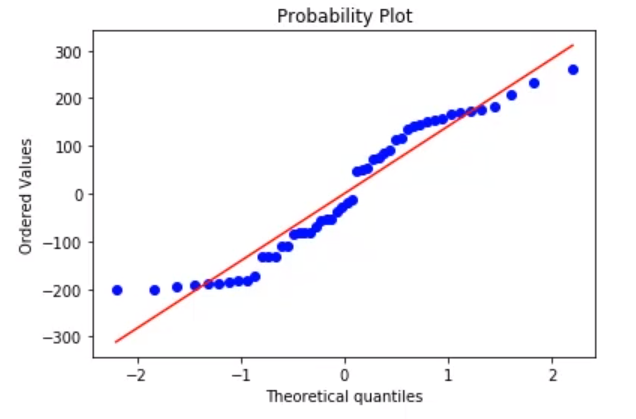

> ### Teste simetria dos resíduos
> ***

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html
from scipy.stats import skew
S = skew(dataset.Residuos)

> ### Teste curtose dos resíduos
> ***

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html
from scipy.stats import kurtosis
